# Game of Thrones Episode 1 EDA

Author: Conor Dewey | Date: 07-21-17

This notebook dives into thousands of scraped tweets over the course of the week leading up to the Game of Thrones season 7 premiere as well as tweets form throughout the live episode. I look into activity rates over time and key word analysis in general as well as specific to characters.

#### Imports

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from time import gmtime, strftime
import numpy as np
import datetime
import time
%matplotlib inline

#### Read In Tweets

In [2]:
tweets_data_path = './got_tweets.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Jul 09 20:25:26 +0000 2017',
 'entities': {'hashtags': [{'indices': [0, 14], 'text': 'danielportman'},
   {'indices': [26, 30], 'text': 'got'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 884146499587788800,
 'id_str': '884146499587788800',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'es',
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'text': '#danielportman Podrick 😍😍😍#got',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'Sun May 23 19:58:39 +0000 2010',
  'default_profile': False,
  'de

#### Convert to Pandas Dataframe

In [3]:
tweets_list = [(tweets_data['created_at'], time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(tweets_data['created_at'],
    '%a %b %d %H:%M:%S +0000 %Y')), tweets_data['user']['location'], tweets_data["retweet_count"], tweets_data["text"] ) for tweets_data in tweets_data]
colNames = ("Time", "RealTime","Location", "Retweets", "Text")
df = pd.DataFrame(tweets_list, columns = colNames)
df.tail()

,Time,RealTime,Location,Retweets,Text
216958,Sun Jul 09 20:44:01 +0000 2017,2017-07-09 20:44:01,,0,"""I am not questioning your honor Lord Janos. I..."
216959,Sun Jul 09 20:35:13 +0000 2017,2017-07-09 20:35:13,Kalisz Wrocław Jelcz-Laskowice,0,"Jeszcze przynajmniej tydzień L4, więc zaczynam..."
216960,Sun Jul 09 20:31:54 +0000 2017,2017-07-09 20:31:54,"South Riding, VA",348,RT @WVUFBRecruiting: 1 week ➡️ @GameOfThrones ...
216961,Sun Jul 09 20:29:37 +0000 2017,2017-07-09 20:29:37,C.A.B.A,0,Cuando queres hacer tu propia maraton de #GoT ...
216962,Sun Jul 09 20:25:26 +0000 2017,2017-07-09 20:25:26,"California, USA",0,#danielportman Podrick 😍😍😍#got


#### Limit to During/Since Episode

In [4]:
df.RealTime = pd.to_datetime(df.RealTime)
currentTime = df.RealTime.max()

start_episode = currentTime.replace(day=17,hour=1, minute=0, second = 0, microsecond = 0)
end_episode = currentTime.replace(day=17,hour=2, minute=0, second = 0, microsecond = 0)
len(df)
df_during = df.loc[(df['RealTime'] > start_episode) & (df['RealTime'] < end_episode)]
df_since = df.loc[(df['RealTime'] > start_episode)]

len(df_during)

25354

#### Activity Analysis

In [5]:
df_during.tail()
df_during = df_during.reset_index(drop=True)
freq_list = [0 , 0 , 0 , 0 , 0 , 0, 0 , 0 , 0 , 0, 0, 0]
for i in range(len(df_during)):
    currentMin = 1
    
    min5 = start_episode + datetime.timedelta(minutes=5)
    min10 = start_episode + datetime.timedelta(minutes=10)
    min15 = start_episode + datetime.timedelta(minutes=15)
    min20 = start_episode + datetime.timedelta(minutes=20)
    min25 = start_episode + datetime.timedelta(minutes=25)
    min30 = start_episode + datetime.timedelta(minutes=30)
    min35 = start_episode + datetime.timedelta(minutes=35)
    min40 = start_episode + datetime.timedelta(minutes=40)
    min45 = start_episode + datetime.timedelta(minutes=45)
    min50 = start_episode + datetime.timedelta(minutes=50)
    min55 = start_episode + datetime.timedelta(minutes=55)
    
    if ((df_during['RealTime'][i] < min5)):
        freq_list[0] = freq_list[0] + 1
    elif ((df_during['RealTime'][i] < min10)):
        freq_list[1] = freq_list[1] + 1
    elif ((df_during['RealTime'][i] < min15)):
        freq_list[2] = freq_list[2] + 1  
    elif ((df_during['RealTime'][i] < min20)):
        freq_list[3] = freq_list[3] + 1    
    elif ((df_during['RealTime'][i] < min25)):
        freq_list[4] = freq_list[4] + 1
    elif ((df_during['RealTime'][i] < min30)):
        freq_list[5] = freq_list[5] + 1
    elif ((df_during['RealTime'][i] < min35)):
        freq_list[6] = freq_list[6] + 1  
    elif ((df_during['RealTime'][i] < min40)):
        freq_list[7] = freq_list[7] + 1    
    elif ((df_during['RealTime'][i] < min45)):
        freq_list[8] = freq_list[8] + 1
    elif ((df_during['RealTime'][i] < min50)):
        freq_list[9] = freq_list[9] + 1    
    elif ((df_during['RealTime'][i] < min55)):
        freq_list[10] = freq_list[10] + 1
    else:
        freq_list[11] = freq_list[11] + 1
        
freq_list

[3274, 4648, 3870, 1685, 1262, 1427, 1648, 1373, 2500, 1471, 1078, 1118]

#### During Episode Visualization

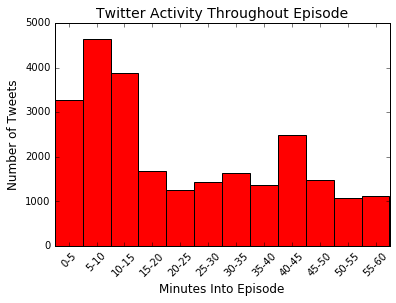

In [6]:
names = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60']
pos = np.arange(len(names))
width = 1 

plt.bar(pos, freq_list, width, color='RED')
plt.title('Twitter Activity Throughout Episode', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Minutes Into Episode', fontsize=12)

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(names)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

In [7]:
df_during.tail()
df_during = df_during.reset_index(drop=True)
freq_list = np.zeros(61)
for i in range(len(df_during)):
    plusMin = 0
    for x in range(0,len(freq_list)-1):
        currentTime = df_during['RealTime'][i]
        roundedTime = currentTime.replace(second = 0, microsecond = 0)
        testTime = currentTime.replace(minute = plusMin, second = 0, microsecond = 0)
        if ((roundedTime == testTime)):
            freq_list[x] = freq_list[x] + 1
        plusMin = plusMin + 1

freq_list = np.delete(freq_list, 60)
freq_list

array([  686.,   755.,   665.,   640.,   528.,   623.,   685.,   857.,
        1182.,  1301.,  1220.,   998.,   665.,   526.,   461.,   380.,
         366.,   327.,   300.,   312.,   249.,   269.,   224.,   230.,
         290.,   293.,   296.,   302.,   278.,   258.,   268.,   264.,
         383.,   351.,   382.,   273.,   270.,   262.,   279.,   289.,
         566.,   499.,   583.,   465.,   387.,   347.,   341.,   258.,
         262.,   263.,   224.,   213.,   226.,   188.,   227.,   236.,
         220.,   215.,   221.,   226.])

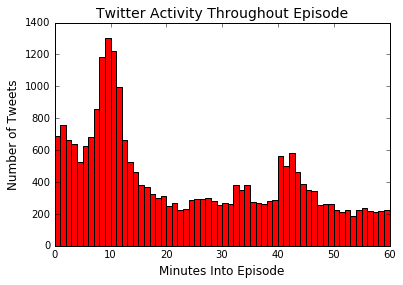

In [8]:
names = []
for i in range(1, 61):
    names.append(str(i))

pos = np.arange(len(names))
width = 1 

plt.bar(pos, freq_list, width, color='RED')
plt.title('Twitter Activity Throughout Episode', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Minutes Into Episode', fontsize=12)

plt.show() 
#10 Minutes: Intro Starts, Arya Just Killed Mormonts, Whitewalkers Coming
#35 Minutes: Sam Montage
#40 Minutes: Ed Sheeran Cameo

#### Long Term Visualization

In [9]:
df.RealTime.min()
df.RealTime.max()

freq_list = df.RealTime.groupby([df["RealTime"].dt.day, df["RealTime"].dt.hour]).count()
names = ['9-20', '9-21', '9-22', '9-23']
for i in range(10,19):
    for j in range(0, 24):
        names.append(str(i) + '-' + str(j))
names = np.delete(names, len(names) - 1)

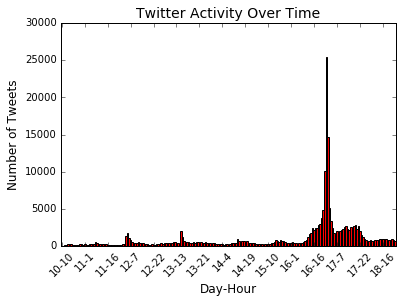

In [10]:
freq_list = np.array(df.RealTime.groupby([df["RealTime"].dt.day, df["RealTime"].dt.hour]).count())
my_names = ['10-10', '11-1', '11-16', '12-7', '12-22', '13-13', '13-21', '14-4', '14-19', '15-10', '16-1', '16-16', '17-7', '17-22', '18-16']

pos = np.arange(len(names))
width = 1 

plt.bar(pos, freq_list, width, color='RED')
plt.title('Twitter Activity Over Time', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Day-Hour', fontsize=12)


ax = plt.axes()
ax.set_xticks(pos + (width / 2))
plt.locator_params(axis='x', nbins = 15)
ax.set_xticklabels(my_names)

ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

plt.show()

#### Key Word Analysis

In [11]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import re, string
import nltk
tweets_texts = df["Text"].tolist()

In [12]:
default_stopwords = set(nltk.corpus.stopwords.words('english'))
english_vocab = set(w.lower() for w in nltk.corpus.words.words())
def process_tweet_text(tweet):
    if tweet.startswith('@null'):
        return "[Tweet not available]"
    tweet = re.sub(r'\$\w*','',tweet) # Remove tickers
    tweet = re.sub(r'https?:\/\/.*\/\w*','',tweet) # Remove hyperlinks
    tweet = re.sub(r'['+string.punctuation+']+', ' ',tweet) # Remove puncutations like 's
    twtok = TweetTokenizer(strip_handles=True, reduce_len=True)
    tokens = twtok.tokenize(tweet)
    #tokens = [i.lower() for i in tokens if i not in stopwords and len(i) > 2 and i in english_vocab]    
    return tokens


In [13]:
word_list = []
for tw in tweets_texts:
    word_list += process_tweet_text(tw)
word_list[:5]

['Marketing', 'at', 'its', 'finest', 'I']

In [14]:
stops = stopwords.words('english')
new_stops = ['game', 'games', 'of', 'thrones', 'throne', 'got', 'gots', 'season', 'episode',
            'like', 'lens', 'para', 'tenter']
for i in range(len(new_stops)):
    stops.append(str(new_stops[i]))

filtered_words = [word for word in word_list if word not in stops]

In [15]:
print(len(word_list))

3221439


In [16]:
print(len(filtered_words))

2524409


In [17]:
filtered_words[:5]

['Marketing', 'finest', 'I', 'would', 'buy']

In [18]:
filtered_words = [word for word in filtered_words if len(word) > 2]
len(filtered_words)
filtered_words[:5]
len(filtered_words)

1893388

In [19]:
names = ['Daenerys', 'Jon', 'Targaryen', 'Gregor', 'Cersei', 'Lannister', 'Sansa', 'Stark',
        'Arya', 'Khal', 'Drogo', 'Joffery', 'Baratheon', 'Ramsay', 'Bolton', 'Melisandre',
        'Margaery', 'Tyrell', 'Clegane', 'Hodor', 'Brienne', 'Petyr', 'Baelish', 'Theon',
        'Greyjoy', 'Jaime', 'Daario', 'Varys', 'Stannis', 'Bronn', 'Jorah', ' Catelyn', 'Robb',
        'Bran', 'Missandei', 'Tormund', 'Gilly', 'Samwell', 'Sam', 'Podrick', 'Davos', 'Ellaria',
        'Tyrion', 'Sansa', 'Sheeran']

for i in range(len(names)):    
    english_vocab.add(names[i])

filtered_words = [word for word in filtered_words if word in english_vocab]
len(filtered_words)

491118

In [20]:
filtered_words[:5]
for i in range(len(filtered_words)):
    filtered_words[i] = filtered_words[i].lower()

filtered_words[:5]

['would', 'buy', 'watched', 'last', 'night']

In [21]:
from nltk.probability import FreqDist
fdist = FreqDist(filtered_words)
fdist

FreqDist({'basket': 1,
          'plumed': 1,
          'festival': 10,
          'bere': 2,
          'carrizo': 31,
          'wer': 12,
          'afraid': 44,
          'tam': 13,
          'deliberately': 3,
          'sina': 1,
          'aka': 92,
          'mourning': 5,
          'mineral': 2,
          'ash': 5,
          'weeps': 1,
          'extra': 47,
          'viking': 5,
          'listen': 201,
          'petite': 28,
          'sty': 1,
          'compromise': 1,
          'credit': 22,
          'northward': 2,
          'intellectual': 5,
          'exhibition': 1,
          'testes': 1,
          'smirk': 12,
          'slouch': 1,
          'ticket': 11,
          'shrimp': 4,
          'crash': 45,
          'ticking': 3,
          'ice': 172,
          'baal': 1,
          'cracking': 14,
          'wanting': 47,
          'meanwhile': 20,
          'censor': 3,
          'pinball': 5,
          'salute': 5,
          'ceremony': 3,
          'misery': 1,
    

#### Visualization via Wordcloud

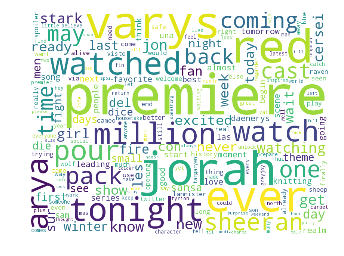

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud( background_color='WHITE', height = 600, width = 800)
wordcloud.generate_from_frequencies(frequencies=fdist)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Character Visualization via Bar Plot

In [23]:
fdist_top = fdist.most_common(20)
fdist_top

[('premiere', 9467),
 ('red', 6167),
 ('jorah', 6162),
 ('varys', 6053),
 ('ever', 5678),
 ('tonight', 5547),
 ('watched', 5063),
 ('arya', 4831),
 ('million', 4578),
 ('watch', 4502),
 ('pour', 4306),
 ('sheeran', 4276),
 ('pack', 4113),
 ('one', 3944),
 ('coming', 3586),
 ('may', 3426),
 ('time', 3390),
 ('cast', 3378),
 ('back', 3170),
 ('watching', 3169)]

In [24]:
names = []
counts = []
for i in range(len(fdist_top)):
    names.append((fdist_top[i])[0])
    counts.append((fdist_top[i])[1])

In [25]:
top = pd.DataFrame({'Word':names, 'Count': counts})
cols = ['Word', 'Count']
top = top[cols]
top

,Word,Count
0,premiere,9467
1,red,6167
2,jorah,6162
3,varys,6053
4,ever,5678
5,tonight,5547
6,watched,5063
7,arya,4831
8,million,4578
9,watch,4502


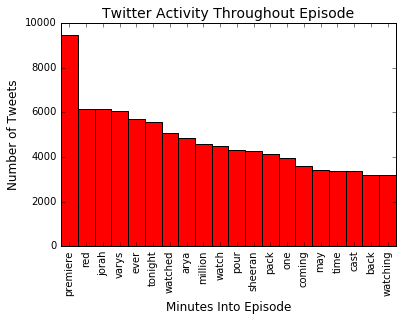

In [26]:
pos = np.arange(len(names))
width = 1 

plt.bar(pos, counts, width, color='RED')
plt.title('Twitter Activity Throughout Episode', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Minutes Into Episode', fontsize=12)

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(names)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)

plt.show()

#### Visualization of Top Characters

In [27]:
names = ['jorah', 'varys', 'arya', 'jon', 'cersei', 'sansa', 'daenerys', 'sam', 'tyrion', 'hodor']
counts = []
for i in range(len(names)):
    counts.append(fdist[names[i]])
counts

[6162, 6053, 4831, 2952, 2597, 1619, 1444, 1205, 705, 469]

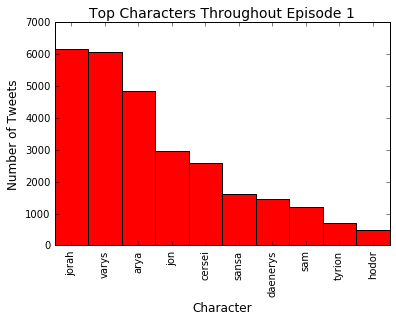

In [28]:
pos = np.arange(len(names))
width = 1 

plt.bar(pos, counts, width, color='RED')
plt.title('Top Characters Throughout Episode 1', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Character', fontsize=12)

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(names)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)

plt.show()

In [29]:
fdist['sheeran']

4276

In [30]:
len(df_during)

25354